In [ ]:
%pip install pytse_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
# import pytse_client as tse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error


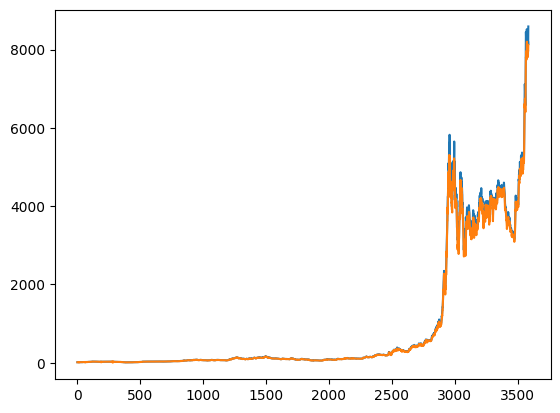

In [2]:
## stock lstm ##

# load data #
data = pd.read_csv("data.csv")

# plot data #
plt.plot(data["high"])
plt.plot(data["low"])
plt.show()

In [3]:
# data preprocessing #
data = data[["high", "low"]]
data = data.values
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)

# split data #
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:]

# create dataset #
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        dataX.append(dataset[i:(i+time_step), :])
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# reshape data #
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 2)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 2)

In [10]:
data = pd.read_csv('data.csv')
data = data[["high", "low"]]
data = data.values
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)


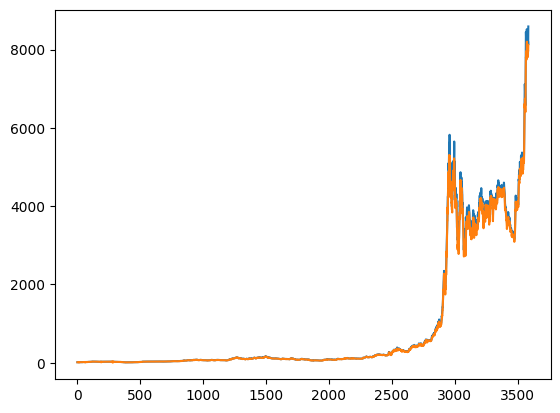

In [12]:
plt.plot(scaler.inverse_transform(data))

2023-04-30 14:32:10.970483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-30 14:32:10.972362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-30 14:32:10.973473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

20/20 [==============================] - 1s 34ms/step


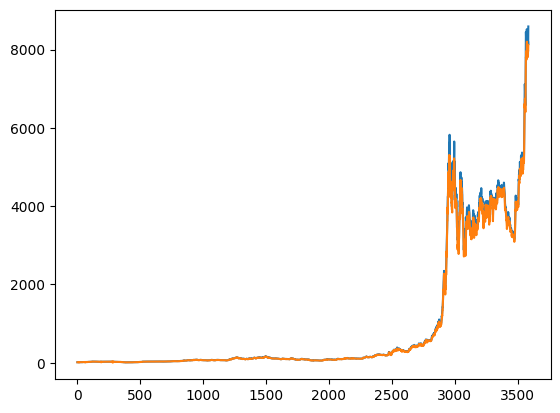

In [15]:
from tensorflow.keras.models import load_model
model = load_model("fameli.h5")
# predict #
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict.shape

train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict)+time_step, :] = train_predict
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(time_step*2)+1:len(data)-1, :] = test_predict
plt.plot(scaler.inverse_transform(data))
# plt.plot(train_predict_plot)
# plt.plot(test_predict_plot)
plt.show()

In [24]:
X_train = scaler.inverse_transform(X_train)
X_test = scaler.inverse_transform(X_test)
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


ValueError: Found array with dim 3. None expected <= 2.

ValueError: non-broadcastable output operand with shape (2767,1) doesn't match the broadcast shape (2767,2)

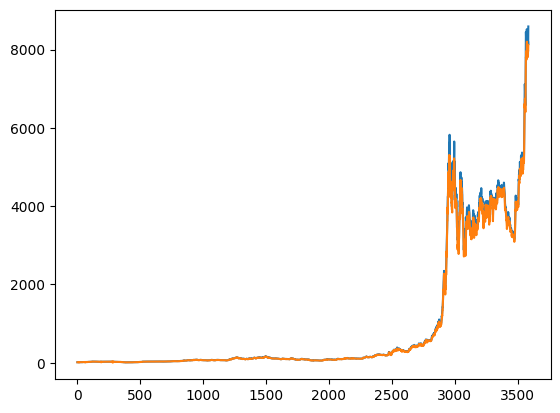

In [22]:
plt.plot(scaler.inverse_transform(data))

plt.plot(scaler.inverse_transform(train_predict))
plt.show()

In [17]:
# create model #
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 2)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()

2023-04-30 14:42:38.926634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-30 14:42:38.927745: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-30 14:42:38.929592: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10600     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51,051
Trainable params: 51,051
Non-trainable params: 0
_________________________________________________________________


2023-04-30 14:42:39.681820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-30 14:42:39.684778: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-30 14:42:39.686253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [18]:
# train model #
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100


2023-04-30 14:42:40.167204: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-30 14:42:40.169135: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-30 14:42:40.171429: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

44/44 [==============================] - ETA: 0s - loss: 4.6418e-05

2023-04-30 14:42:52.915679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-30 14:42:52.931500: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-30 14:42:52.944820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

44/44 [==============================] - 15s 193ms/step - loss: 4.6418e-05 - val_loss: 0.0067
Epoch 2/100
 5/44 [==>...........................] - ETA: 5s - loss: 6.3743e-06

KeyboardInterrupt: 

In [19]:
# predict #
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict.shape

2023-04-30 14:43:07.053642: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-30 14:43:07.055614: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-30 14:43:07.057358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

20/20 [==============================] - 1s 29ms/step


(2767, 1)

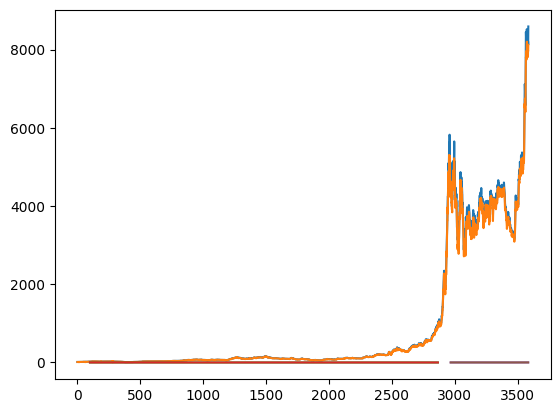

1/1 [==============================] - 0s 38ms/step
[[1.0606663]]


In [ ]:
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict)+time_step, :] = train_predict
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(time_step*2)+1:len(data)-1, :] = test_predict
plt.plot(scaler.inverse_transform(data))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

# predict future #
x_input = test_data[len(test_data)-time_step:len(test_data), :]
x_input = x_input.reshape(1, time_step, 2)
future = model.predict(x_input)
# future = scaler.inverse_transform(future)
print(future)

# save model #
model.save("fameli.h5")


In [ ]:


# invert predictions #
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# calculate RMSE #
train_score = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
test_score = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print("Train Score: %.2f RMSE" % (train_score))
print("Test Score: %.2f RMSE" % (test_score))

# plot #
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict)+time_step, :] = train_predict
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(time_step*2)+1:len(data)-1, :] = test_predict
plt.plot(scaler.inverse_transform(data))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

# predict future #
x_input = test_data[len(test_data)-time_step:len(test_data), :]
x_input = x_input.reshape(1, time_step, 2)
future = model.predict(x_input)
future = scaler.inverse_transform(future)
print(future)

# save model #
model.save("fameli.h5")




NameError: name 'train_predict' is not defined

In [ ]:
## load model ##
from tensorflow.keras.models import load_model
model = load_model("fameli.h5")

# predict future #
x_input = test_data[len(test_data)-time_step:len(test_data), :]
x_input = x_input.reshape(1, time_step, 2)
x_input = scaler.inverse_transform(x_input)
future = model.predict(x_input)
print(future)


2023-04-30 13:43:00.959946: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-30 13:43:00.961064: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-30 13:43:00.962675: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

ValueError: Found array with dim 3. None expected <= 2.